In [1]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [2]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [3]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [4]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [5]:
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


In [6]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate itemsets with confidence over 70%.
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


In [7]:
support=rules.values
confidence=rules.values

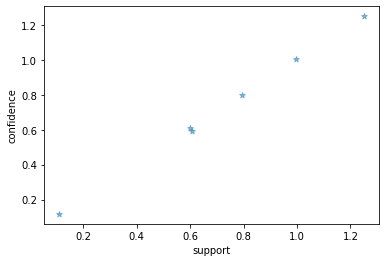

In [8]:
import random
import matplotlib.pyplot as plt
 
support_=list(list(support)[0][2:])
confidence_=list(list(confidence)[0][2:])
ids=[]
idc=[]
for i in range (len(support_)):
    if(isinstance(support_[i],float)):
        support_[i] = support_[i] + 0.0025 * (random.randint(1,10) - 5) 
    else:
        #support_[i]=0
        ids.append(i)
    if(isinstance(confidence_[i],float)):    
        confidence_[i] = confidence_[i] + 0.0025 * (random.randint(1,10) - 5)
    else:
        #confidence_[i]=0
        ids.append(i)
x=len(idc)
'''for i in range(len(idc)):
    confidence_.pop()
for i in range(len(ids)):
    ids.pop(0)'''
    

plt.scatter(support_, confidence_,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [9]:
#dataset 2
import pandas as pd
data = pd.read_csv("./Market_Basket_Optimisation.csv")


In [10]:
data.iloc[0:50]

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,eggs,pet food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
'''n=data.isnull().sum().sum()
if(n==0):
    print("our data is ready to be used")
else:
    print("No! there are :",n,"total null values")
    #we check if there are any null values
    for col in data.columns:
        #if a column doesnt have any null values then there is no point processing it
        if(data[col].isnull().sum()>0):
            if(str(data.dtypes[col]) in ["int64","float64","int32","float32"]):
                #if our data numerical (is either float or int) 
                before=data[col].isnull().sum()
                print(col,"before",data[col].isnull().sum())
                data[col].fillna(data[col].mean(),inplace=True)
                print(col,"after",data[col].isnull().sum())
                if(before!=0 and data[col].isnull().sum()==before):
                    print("dropping ",col)
                    data=data.drop([col], axis=1)
                
            elif (str(data.dtypes[col])=="object"):
                #if our data is categorical (is an object)
                a=data[col].mode()
                l=len(a)
                s=a[l-1]
                print(s)
                before=data[col].isnull().sum()
                print(col,"before",data[col].isnull().sum())
                data[col].fillna(s,inplace=True)
                print(col,"after",data[col].isnull().sum())
                if(before!=0 and data[col].isnull().sum()==before):
                    print("dropping ",col)
                    data=data.drop([col], axis=1)
                
        
    
    print("our data should now be ready to be used.")   '''      

'n=data.isnull().sum().sum()\nif(n==0):\n    print("our data is ready to be used")\nelse:\n    print("No! there are :",n,"total null values")\n    #we check if there are any null values\n    for col in data.columns:\n        #if a column doesnt have any null values then there is no point processing it\n        if(data[col].isnull().sum()>0):\n            if(str(data.dtypes[col]) in ["int64","float64","int32","float32"]):\n                #if our data numerical (is either float or int) \n                before=data[col].isnull().sum()\n                print(col,"before",data[col].isnull().sum())\n                data[col].fillna(data[col].mean(),inplace=True)\n                print(col,"after",data[col].isnull().sum())\n                if(before!=0 and data[col].isnull().sum()==before):\n                    print("dropping ",col)\n                    data=data.drop([col], axis=1)\n                \n            elif (str(data.dtypes[col])=="object"):\n                #if our data is cate

In [12]:
data.columns

Index(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'],
      dtype='object')

In [50]:
def fun(variable): 
    
    if (variable is not np.nan): 
        return True
    else: 
        return False

In [85]:
import numpy as np
liste=data.values.tolist()
l0=liste[17]
l0

['turkey',
 'fresh tuna',
 'tomatoes',
 'spaghetti',
 'mineral water',
 'black tea',
 'salmon',
 'eggs',
 'chicken',
 'extra dark chocolate',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [86]:
l0.remove(np.nan)


In [87]:
l0

['turkey',
 'fresh tuna',
 'tomatoes',
 'spaghetti',
 'mineral water',
 'black tea',
 'salmon',
 'eggs',
 'chicken',
 'extra dark chocolate',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [88]:
liste_=list(map(lambda sous_liste:list(filter(fun,sous_liste))[:-1],liste))
liste_

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'],
 ['rice', 'sparkling water'],
 ['spaghetti', 'mineral water', 'ham', 'body spray',

In [59]:
l0=list(map(list(filter(fun,l0))[:-1]))
l0

['turkey',
 'fresh tuna',
 'tomatoes',
 'spaghetti',
 'mineral water',
 'black tea',
 'salmon',
 'eggs',
 'chicken',
 'extra dark chocolate']

In [18]:
liste=list(map(lambda x:x[1:],liste))
liste

In [ ]:
''''''

[]

In [49]:
data.values.tolist().remove("nan")

ValueError: list.remove(x): x not in list

In [36]:
e=l0[5]
e
print(5 == np.nan)
print(np.nan)
print(e)

False
nan
nan


In [90]:
lista=[[4,2,np.nan],[4,2,5,np.nan]]

In [92]:
lista=list(map(lambda x:list(filter(lambda x:x != np.nan,x)),x))

TypeError: 'int' object is not iterable

[['b'], ['d', 'a']]